In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import re
from shapely.geometry import Polygon

In [189]:
df = pd.read_excel('table.xlsx')
df#.tail()

,State,Persons,Males,Females
0,Andaman & Nicobar Island,67.64,37.4 1,30.23
1,Andhra Pradesh,25.52,14.42,11.10
2,Arunanchal Pradesh,64.03,34.57,29.45
3,Assam,46.34,25.57,20.77
4,Bihar,16.10,9.07,7.03
5,Chandigarh,54.95,30.59,24.35
6,Chhattisgarh,13.25,7.13,6.12
7,Dadara & Nagar Havelli,57.89,32.94,24.95
8,Daman & Diu,47.95,29.3,18.65
9,NCT of Delhi,40.61,22.59,18.02


In [179]:
map_data= gpd.read_file('/home/debodeep94/OneDrive/Indian researcher/desidata/football/archive/India States/Indian_states.shp')
map_data

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
9,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


<Axes: >

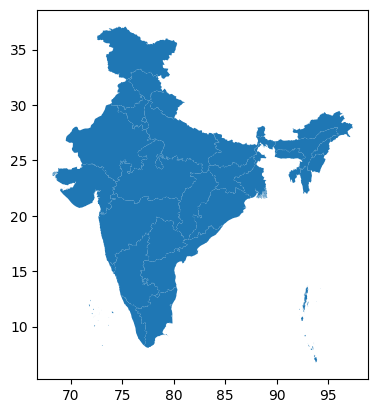

In [180]:
map_data.plot()

In [181]:
pol1=map_data[map_data['st_nm']=='Andhra Pradesh']['geometry'].reset_index(drop=True)
pol2=map_data[map_data['st_nm']=='Telangana']['geometry'].reset_index(drop=True)
pol3 = pol1.union(pol2).reset_index(drop=True)


# reset Jnk & Ladakh
#pol4=map_data[map_data['ST_NM']=='Jammu & Kashmir']['geometry'].reset_index(drop=True)
#pol5=map_data[map_data['ST_NM']=='Ladakh']['geometry'].reset_index(drop=True)
#pol6 = pol4.union(pol5).reset_index(drop=True)

In [182]:
# Find the index where 'ST_NM' is 'Andhra Pradesh' and 'Telangana' in map_data
indices_to_update = map_data[(map_data['st_nm'] == 'Andhra Pradesh') | (map_data['st_nm'] == 'Telangana')].index

# Update 'geometry' values in map_data using the indices
map_data.loc[indices_to_update, 'geometry'] = list(pol3)[0]
map_data.loc[indices_to_update, 'st_nm']='Andhra Pradesh'
#map_data.at[32, 'geometry']=pol3

In [183]:
'''
# Find the index where 'ST_NM' is 'Andhra Pradesh' and 'Telangana' in map_data
indices_to_update = map_data[(map_data['ST_NM'] == 'Jammu & Kashmir') | (map_data['ST_NM'] == 'Ladakh')].index

# Update 'geometry' values in map_data using the indices
map_data.loc[indices_to_update, 'geometry'] = list(pol6)[0]
map_data.loc[indices_to_update, 'ST_NM']='Jammu & Kashmir'
#map_data.at[32, 'geometry']=pol3
'''

"\n# Find the index where 'ST_NM' is 'Andhra Pradesh' and 'Telangana' in map_data\nindices_to_update = map_data[(map_data['ST_NM'] == 'Jammu & Kashmir') | (map_data['ST_NM'] == 'Ladakh')].index\n\n# Update 'geometry' values in map_data using the indices\nmap_data.loc[indices_to_update, 'geometry'] = list(pol6)[0]\nmap_data.loc[indices_to_update, 'ST_NM']='Jammu & Kashmir'\n#map_data.at[32, 'geometry']=pol3\n"

In [185]:
map_data

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
9,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


<Axes: >

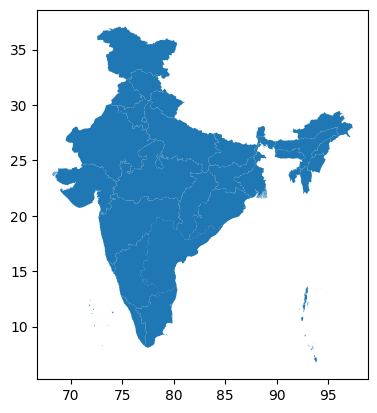

In [186]:
map_data.plot()

In [190]:
merged = map_data.set_index('st_nm').join(df.set_index('State'))#.reset_index(level=0, inplace=True)
merged#.head()

,geometry,Persons,Males,Females
st_nm,,,,
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",67.64,37.4 1,30.23
Andhra Pradesh,"MULTIPOLYGON (((81.10610 17.82436, 81.11742 17...",25.52,14.42,11.10
Andhra Pradesh,"MULTIPOLYGON (((81.10610 17.82436, 81.11742 17...",25.52,14.42,11.10
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",64.03,34.57,29.45
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",46.34,25.57,20.77
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",16.10,9.07,7.03
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",54.95,30.59,24.35
Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",13.25,7.13,6.12
Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650...",57.89,32.94,24.95


/home/debodeep94/anaconda3/envs/env-pytorch/lib/python3.10/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Figure size 14400x9600 with 0 Axes>

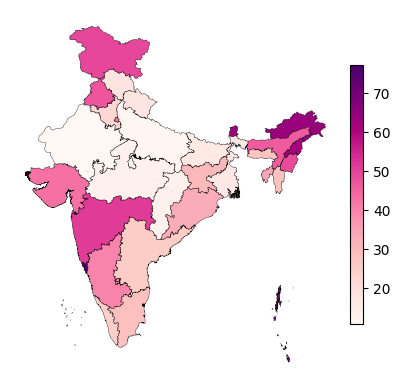

In [195]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Assuming 'merged' is a GeoDataFrame with a 'Persons' column for plotting
fig = plt.figure(figsize=(12, 8), dpi=1200)

# Create the plot using the 'RdPu' colormap, disable the GeoDataFrame legend
ax = merged.plot(column='Persons', categorical=False, legend=False,
                  cmap='RdPu', edgecolor='black', linewidth=0.25)

# Customize the colorbar legend with reduced length (shrink=0.7)
sm = plt.cm.ScalarMappable(cmap='RdPu', norm=plt.Normalize(vmin=merged['Persons'].min(), vmax=merged['Persons'].max()))
sm._A = []
cbar = plt.colorbar(sm, ax=ax, pad=0.02, shrink=0.7)  # Adjust the shrink parameter as needed

# Remove x-axis and y-axis ticks and frame
plt.xticks([])
plt.yticks([])
ax.set_frame_on(False)

# Save the plot
plt.savefig('/home/debodeep94/OneDrive/Indian researcher/desidata/language/all_perc.svg', bbox_inches='tight')

# Show the plot (optional)
plt.show()
